## **단순회귀분석**(연속형 독립변수가 하나인 모델)

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

#선형모델 추정하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

기온과 맥주 매상의 관계

In [2]:
beer=pd.read_csv("5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


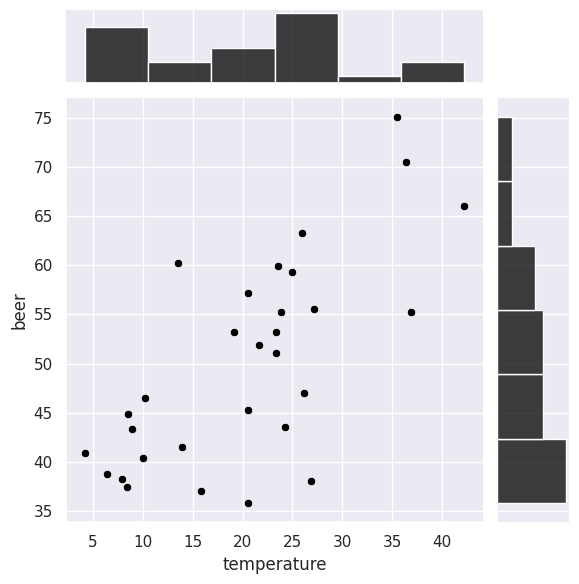

In [3]:
sns.jointplot(x="temperature",y="beer", data=beer, color='black')

ols: 범용최소제곱법 (Ordinary Least Squares)

In [5]:
lm_model=smf.ols(formula="beer~temperature",data=beer).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.11e-05
Time:                        04:00:58   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

왼쪽부터 상관계수(기울기), 표준오차, t값, 귀무가설을 '계수의 값이 0'이라고 했을 때의 p값, 95%신뢰구간에서 하측신뢰한계, 상측신뢰한계

기온에 대한 계숫값이 0.7654로 양수이므로 기온이 오르면 맥주매상 오름

**AIC를 이용한 모델 선택**

독립변수가 1개이므로 NULL 모델의 AIC와 독립변수 모델 AIC 비교

독립변수 모델의 AIC가 더 작다면 채택

In [6]:
null_model=smf.ols("beer~1",data=beer).fit()

In [8]:
null_model.aic

227.94194972563105

In [10]:
lm_model.aic

208.90902935575437

독립변수 있는 모델이 AIC가 더 작으므로 기온이라는 독립변수가 있는 쪽이 예측정확도가 높아지는 것이 아닐까 추측 가능

AIC = -2 * (최대로그우도 - 추정된 파라미터 수)

In [11]:
lm_model.llf #로그우도

-102.45451467787719

In [12]:
lm_model.df_model #사용된 독립변수의 수

1.000

In [13]:
-2*(lm_model.llf-(lm_model.df_model+1)) #추정된 파라미터 수= 독립변수 수 + 절편

208.90902935575437

**회귀직선**: 모델에 의한 종속변수의 추측값을 직선으로 표시

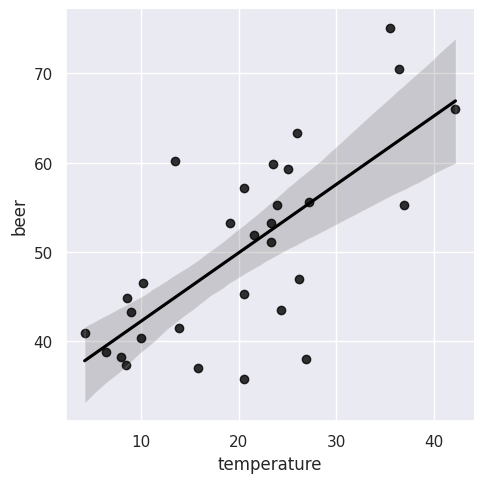

In [14]:
sns.lmplot(x="temperature",y="beer", data=beer,
           scatter_kws={"color":"black"}, #산포도 디자인
           line_kws={"color":"black"}) #회귀직선 디자인

음영부분은 95% 신뢰구간 의미

모델을 이용한 예측

In [15]:
#아무 입력 안하면 훈련 데이터 그대로 나옴
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [16]:
#기온이 0일 때의 맥주 매상 기댓값
lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    34.610215
dtype: float64

In [17]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [18]:
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

**잔차 계산**: 모델의 평가 방법

정규선형모델은 잔차가 "평균이 0인 정규분포" 따르는 것이므로 모델이 그 분포를 따르고 있는지 체크해야

In [19]:
resid=lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

**결정계수(R^2)**: 가지고 있는 데이터에 대해 모델을 적용했을 때 적합도 평가한 지표

추측치가 실젯값과 같으면 1

In [20]:
mu=sp.mean(beer.beer)
y=beer.beer
yhat=lm_model.predict()

sp.sum((yhat-mu)**2)/sp.sum((y-mu)**2)

0.5039593230611875

In [21]:
lm_model.rsquared

0.5039593230611858

수정된 결정계수

독립변수의 수가 늘어나는 것에 대해 페널티 적용한 결정계수 (독립변수가 늘어날수록 큰값이 되어 과학습 유발)

In [22]:
lm_model.rsquared_adj

0.48624358459908534

<Axes: ylabel='Density'>

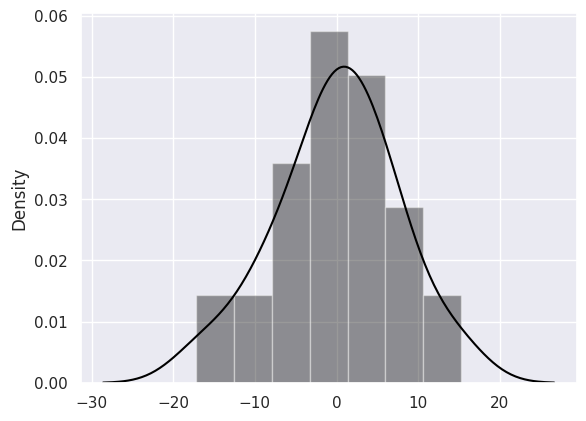

In [23]:
sns.distplot(resid, color='black')

**Q-Q 플롯**

이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것

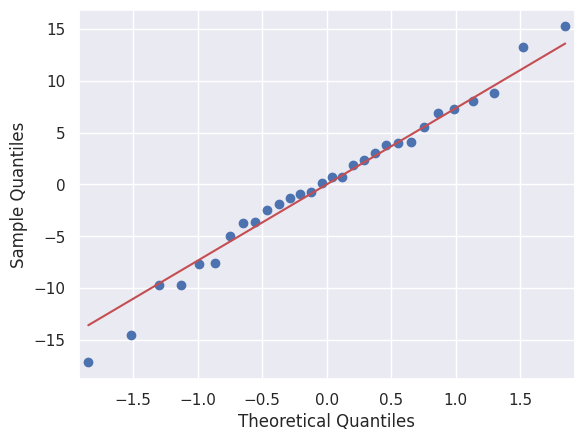

In [25]:
fig=sm.qqplot(resid, line="s")

Q-Q 플롯 직접 만들어보기

In [26]:
resid_sort=resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [27]:
1/31

0.032

In [28]:
nobs=len(resid_sort)
cdf=np.arange(1,nobs+1)/(nobs+1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [29]:
ppf=stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])